## Computer vision

This book will explore computer vision and convolutional neural networks with pytorch.

### 0. Computer vision libraries for pytorch
* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision.
* `torchvision.models` - pre-trained models for computer vision
* `torchvision.transforms` - functions for manipulating your vision data
to be suitable for use with a ML model
* `torchvision.utils.data.Dataset` - base dataset class for PyTorch
* `torchvision.utils.data.DataLoader` - creates a Python iterable over a dataset

In [1]:
import torch 
from torch import nn

# torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


### 1. Getting data ready

The dataset we'll be using is FashionMNIST from torchvision.datasets 

In [2]:
from torchvision import datasets

In [3]:
train_data = datasets.FashionMNIST(
    root = "data", # where to download to
    train = True, 
    download = True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
test_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download = True,
    transform= ToTensor(),
    target_transform=None
)

In [5]:
test_data, train_data

(Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [6]:
# the first training example
image, label = test_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
classnames = train_data.classes
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
classname_to_idx = train_data.class_to_idx
classname_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
classnames[label]

'Ankle boot'

In [11]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

**1.2 visualizing our data**

In [12]:
import matplotlib.pyplot as plt

In [13]:
image, label = train_data[1]
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'T-shirt/top')

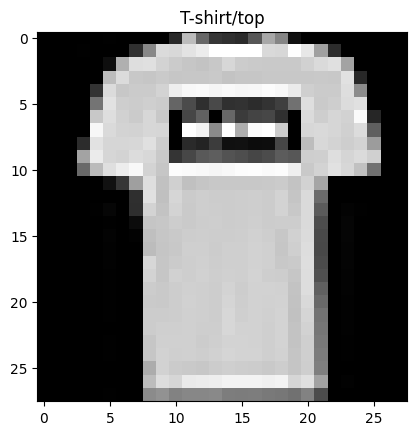

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classnames[label])

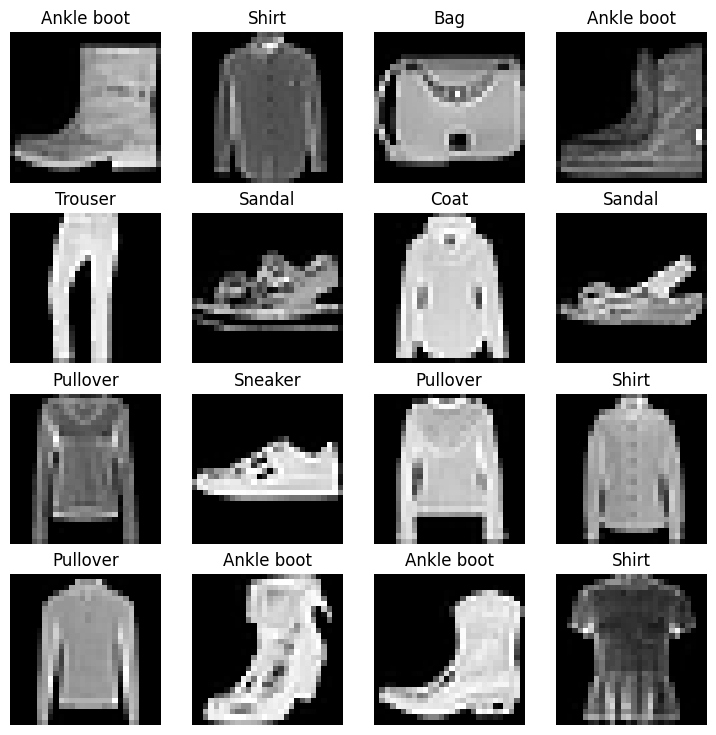

In [15]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classnames[label])
    plt.axis(False)

**Prepare DataLoader**

In [16]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=32,shuffle=True)

In [17]:
## 

**Model 0: Build a baseline model**

when starting to build a series of machine learning modelling experiments, best practice
is to start with a base line model.
A base line model is a simple model you will try to imporve upon subsequent experiments.


In [18]:
flatten_model = nn.Flatten()
image, label = train_data[0]
print(f"Shape of the data before flattening {image.shape}")
x = flatten_model(image)
print(f"Shape of the data after flattening {x.shape}")
print(f"Shape of the data after squeezing the flattened data: {x.squeeze().shape}")

Shape of the data before flattening torch.Size([1, 28, 28])
Shape of the data after flattening torch.Size([1, 784])
Shape of the data after squeezing the flattened data: torch.Size([784])


In [19]:
from torch import nn

class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, out_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=out_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_0 = FashionMNISTModel(input_shape=28 * 28, hidden_units=10, out_shape=len(classnames)).to("cpu")

In [21]:
with torch.inference_mode():
    dummy_x = torch.rand([1, 1, 28, 28])
    y_pred = model_0(dummy_x)

y_pred, y_pred.shape

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]]),
 torch.Size([1, 10]))

**Setup loss and optimization function with some evaluation metrics**

- We are going to use `CrossEntropyLoss` since the problem is a multi class classification problem
- Optimizer - Our optimizer is going to be stochastic gradient descent
- Evaluation metrics - accuracy

In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [24]:
# check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [25]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [27]:
from timeit import default_timer as timer

In [28]:
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")

In [29]:
start = timer()
# ....
end = timer()
print_train_time(start=start, end=end, device="cpu")

Train time on cpu: 0.00 seconds


In [42]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

In [30]:
## Different approach? the training loop will update the weights after every batch not loop

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps and calculate train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**
4. Print out what's happening
5. Time it all

In [31]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [32]:
!pip install tqdm

In [44]:
from tqdm import tqdm

In [47]:
torch.manual_seed(42)
train_time_start = timer() # cpu
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_loss = 0
    test_loss, test_acc = 0, 0
    for batch, (image, label) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(image)

        loss = loss_fn(y_pred, label)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print out what't happening
        if batch % 400 == 0:
            print(f"Looked at {(batch * len(image))} / {len(train_dataloader.dataset)} samples")

        # Divide the total train loss by len of train_dataloader
        train_loss /= len(train_dataloader)

        ## Testing
    
        model_0.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                test_pred = model_0(X_test)
                test_loss += loss_fn(test_pred, y_test)
                test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
            # test loss average per batch 
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
        print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    # calculate training time
    train_time_end = timer()
    total_train_time = print_train_time(start=train_time_start, end=train_time_end, device="cpu")

  0%|                                                                                                                                                     | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples
Train loss: 0.0011 | Test loss: 2.3284 | Test acc: 17.4022
Train loss: 0.0012 | Test loss: 2.2144 | Test acc: 20.0436
Train loss: 0.0012 | Test loss: 2.1652 | Test acc: 19.3332
Train loss: 0.0012 | Test loss: 2.1313 | Test acc: 21.6273
Train loss: 0.0011 | Test loss: 2.0786 | Test acc: 34.0348
Train loss: 0.0011 | Test loss: 2.0262 | Test acc: 36.0313
Train loss: 0.0011 | Test loss: 1.9818 | Test acc: 37.1758
Train loss: 0.0010 | Test loss: 2.0218 | Test acc: 26.1371
Train loss: 0.0011 | Test loss: 1.9281 | Test acc: 37.9130
Train loss: 0.0010 | Test loss: 1.8839 | Test acc: 42.7030
Train loss: 0.0010 | Test loss: 1.8297 | Test acc: 40.8213
Train loss: 0.0010 | Test loss: 1.8173 | Test acc: 40.9751
Train loss: 0.0010 | Test loss: 1.7728 | Test acc: 43.4516
Train loss: 0.0010 | Test loss: 1.7189 | Test acc: 43.9288
Train loss: 0.0009 | Test loss: 1.7448 | Test acc: 43.8804
Train loss: 0.0009 | Test loss: 1.6457 | Test acc: 51.6178
Train loss: 0

 33%|██████████████████████████████████████████████▎                                                                                            | 1/3 [28:42<57:25, 1722.57s/it]

Train loss: 0.0002 | Test loss: 0.5106 | Test acc: 82.3375
Train time on cpu: 1722.57 seconds
Epoch: 1
-----
Looked at 0 / 60000 samples
Train loss: 0.0002 | Test loss: 0.5118 | Test acc: 82.2983
Train loss: 0.0002 | Test loss: 0.5203 | Test acc: 81.7625
Train loss: 0.0001 | Test loss: 0.5073 | Test acc: 82.6694
Train loss: 0.0003 | Test loss: 0.5072 | Test acc: 82.8021
Train loss: 0.0003 | Test loss: 0.5374 | Test acc: 81.3149
Train loss: 0.0003 | Test loss: 0.6277 | Test acc: 77.8956
Train loss: 0.0003 | Test loss: 0.5363 | Test acc: 81.0596
Train loss: 0.0003 | Test loss: 0.6095 | Test acc: 77.1659
Train loss: 0.0003 | Test loss: 0.5443 | Test acc: 81.1072
Train loss: 0.0003 | Test loss: 0.5588 | Test acc: 81.2096
Train loss: 0.0003 | Test loss: 0.5495 | Test acc: 80.8106
Train loss: 0.0002 | Test loss: 0.4985 | Test acc: 82.8261
Train loss: 0.0002 | Test loss: 0.5088 | Test acc: 82.5729
Train loss: 0.0003 | Test loss: 0.5145 | Test acc: 82.2726
Train loss: 0.0003 | Test loss: 0.532

 67%|████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 2/3 [57:30<28:45, 1725.89s/it]

Train loss: 0.0003 | Test loss: 0.4817 | Test acc: 83.7769
Train time on cpu: 3450.78 seconds
Epoch: 2
-----
Looked at 0 / 60000 samples
Train loss: 0.0002 | Test loss: 0.4836 | Test acc: 83.3966
Train loss: 0.0003 | Test loss: 0.5358 | Test acc: 81.5364
Train loss: 0.0004 | Test loss: 0.4973 | Test acc: 82.6487
Train loss: 0.0003 | Test loss: 0.4769 | Test acc: 83.6207
Train loss: 0.0003 | Test loss: 0.4666 | Test acc: 83.9433
Train loss: 0.0003 | Test loss: 0.5639 | Test acc: 80.7694
Train loss: 0.0003 | Test loss: 0.4765 | Test acc: 83.2952
Train loss: 0.0002 | Test loss: 0.4865 | Test acc: 83.3731
Train loss: 0.0003 | Test loss: 0.4741 | Test acc: 83.4433
Train loss: 0.0002 | Test loss: 0.4905 | Test acc: 83.4535
Train loss: 0.0001 | Test loss: 0.4723 | Test acc: 83.9927
Train loss: 0.0004 | Test loss: 0.4764 | Test acc: 83.7148
Train loss: 0.0003 | Test loss: 0.4993 | Test acc: 83.0250
Train loss: 0.0002 | Test loss: 0.5049 | Test acc: 82.7533
Train loss: 0.0002 | Test loss: 0.480

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:26:20<00:00, 1726.68s/it]

Train loss: 0.0002 | Test loss: 0.4709 | Test acc: 83.5343
Train time on cpu: 5180.05 seconds
